In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import seaborn as sb

In [196]:
ctrlDir = r'C:\Users\kodan\Documents\aqua\ctrl'
pmcaDir = r'C:\Users\kodan\Documents\aqua\pmca'

In [198]:
ctrlFish = os.listdir(ctrlDir)
pmcaFish = os.listdir(pmcaDir)
frameRate = 0.562

In [332]:
event_info = {}
event_info['type'] = []
event_info['event_frequency'] = []
event_info['size'] = []
event_info['big_events'] = []
for fish in ctrlFish:
    toLoad = os.path.join(ctrlDir,fish,'Aqua_Output_Excel.csv')
    aqua_output = pd.read_csv(toLoad).T
    event_info['type'].append('ctrl')
    numEvents = len(aqua_output[0]) - 2
    event_info['event_frequency'].append(numEvents/300 * frameRate)
    event_info['size'].append(np.mean(aqua_output[0][1:-1]))
    allEvents = aqua_output[0][1:-1]
    bigEvents = allEvents[allEvents > 5000]
    event_info['big_events'].append(len(bigEvents)/numEvents)
for fish in pmcaFish:
    toLoad = os.path.join(pmcaDir,fish,'Aqua_Output_Excel.csv')
    aqua_output = pd.read_csv(toLoad).T
    event_info['type'].append('pmca')
    numEvents = len(aqua_output[0]) - 2
    event_info['event_frequency'].append(numEvents/300 * frameRate)
    event_info['size'].append(np.mean(aqua_output[0][1:-1]))
    allEvents = aqua_output[0][1:-1]
    bigEvents = allEvents[allEvents > 5000]
    event_info['big_events'].append(len(bigEvents)/numEvents)

C:\Users\kodan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kodan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kodan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: xlabel='type', ylabel='big_events'>

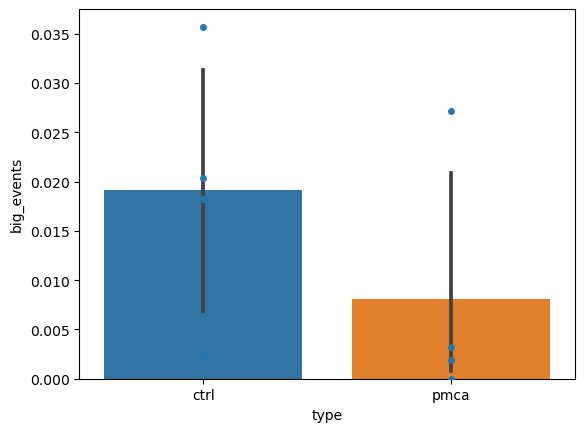

In [334]:
plt.figure()
sb.swarmplot(data = event_info, x = 'type', y = 'big_events')
sb.barplot(data = event_info, x = 'type', y = 'big_events')

In [204]:
pd.DataFrame(event_info).to_csv(r'C:\Users\kodan\Documents\aqua\summary_data.csv')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\kodan\\Documents\\aqua\\summary_data.csv'

In [206]:
pd.read_csv(header = 0)

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

In [306]:
all_events = {}
all_events['type'] = []
all_events['size'] = []

for fish in ctrlFish:
    toLoad = os.path.join(ctrlDir,fish,'Aqua_Output_Excel.csv')
    aqua_output = pd.read_csv(toLoad).T
    fish_event = aqua_output[0][1:-1]
    for i in range(len(fish_event)):
        if(fish_event[i] < 10000):
            all_events['type'].append('ctrl')
            if(fish_event[i] > 300):
                all_events['size'].append(300)
            else:
                all_events['size'].append(fish_event[i])
            
            

for fish in pmcaFish:
    toLoad = os.path.join(pmcaDir,fish,'Aqua_Output_Excel.csv')
    aqua_output = pd.read_csv(toLoad).T
    fish_event = aqua_output[0][1:-1]
    for i in range(len(fish_event)):
        if(fish_event[i] < 10000):
            all_events['type'].append('pmca')
            if(fish_event[i] > 300):
                all_events['size'].append(300)
            else:
                all_events['size'].append(fish_event[i])

C:\Users\kodan\AppData\Local\Temp\ipykernel_9552\1074603691.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(fish_event[i] < 10000):
C:\Users\kodan\AppData\Local\Temp\ipykernel_9552\1074603691.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(fish_event[i] > 300):
C:\Users\kodan\AppData\Local\Temp\ipykernel_9552\1074603691.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_events['size'].append(fish_event[i])
C:\U

C:\Users\kodan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kodan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


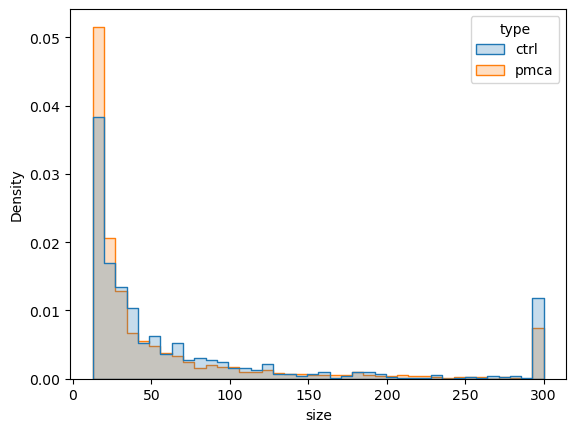

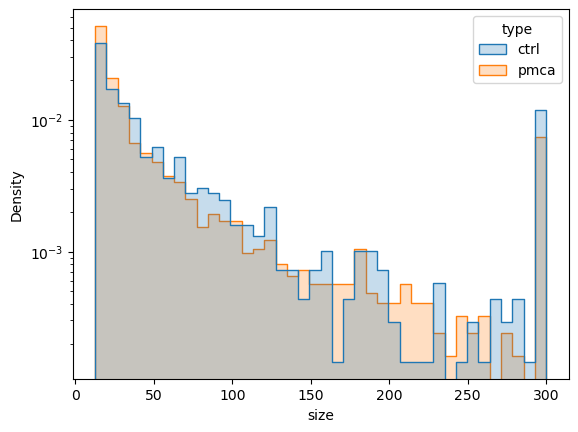

In [322]:
plt.figure()

ax = sb.histplot(data = all_events, x = 'size',hue = 'type', element = 'step',stat="density",common_norm=False)
plt.savefig(r'G:\My Drive\adenosine_paper\adenosine_paper_figures\figS5_revision_hpmca_validation\histogram.svg',dpi=300)
#ax.set_yscale('log')
plt.figure()
ax = sb.histplot(data = all_events, x = 'size',hue = 'type', element = 'step',stat="density",common_norm=False)
ax.set_yscale('log')
#plt.ylim(0,0.02)
#plt.xlim(0,2000)